# Embeddings:
- SVD
- t-SNE
- Word2Vec
- Para2Vec
- Doc2Vec


#PMI
- On Harry potter book pdf.

In [1]:
!wget -O harry.txt "https://raw.githubusercontent.com/amephraim/nlp/master/texts/J.%20K.%20Rowling%20-%20Harry%20Potter%201%20-%20Sorcerer's%20Stone.txt"

--2023-11-15 14:47:34--  https://raw.githubusercontent.com/amephraim/nlp/master/texts/J.%20K.%20Rowling%20-%20Harry%20Potter%201%20-%20Sorcerer's%20Stone.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 439742 (429K) [text/plain]
Saving to: ‘harry.txt’

harry.txt           100%[===================>] 429.44K  --.-KB/s    in 0.02s   

2023-11-15 14:47:34 (25.5 MB/s) - ‘harry.txt’ saved [439742/439742]



In [2]:
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
type(stopwords.words('english'))

list

In [6]:
'we' in stopwords.words('english')  # O(n)

'we' in set(stopwords.words('english')) # O(1)

True

In [7]:
hp = [line.strip() for line in open('harry.txt', encoding='utf8')]

stopwords_ = set(stopwords.words('english'))
words = [word.lower() for sent in hp for word in sent.split()
         if len(word) > 2
         and word not in stopwords_]


In [9]:
len([word.lower() for sent in hp for word in sent.split()])

78451

In [8]:
len(words)

46166

In [10]:
finder = BigramCollocationFinder.from_words(words)
bgm = BigramAssocMeasures()
score = bgm.mi_like
collocations = {bigram: pmi for bigram, pmi in finder.score_ngrams(score)}
collocations

{('uncle', 'vernon'): 41.77299253034547,
 ('aunt', 'petunia'): 25.904895104895104,
 ('professor', 'mcgonagall'): 21.360907208733295,
 ('privet', 'drive'): 5.941964285714286,
 ('mr.', 'dursley'): 5.858035714285714,
 ('fred', 'george'): 4.359126984126984,
 ('lee', 'jordan'): 4.0,
 ("king's", 'cross'): 3.4722222222222223,
 ('said', 'ron.'): 3.2682440846824408,
 ('"wingardium', 'leviosa!"'): 3.0,
 ('said', 'harry.'): 2.705915678524374,
 ('hooded', 'figure'): 2.6666666666666665,
 ('nimbus', 'two'): 2.6470588235294117,
 ('smelting', 'stick,'): 2.2857142857142856,
 ('bettie', "bott's"): 2.25,
 ('defense', 'against'): 2.25,
 ('headless', 'nick'): 2.25,
 ('platform', 'nine'): 2.1333333333333333,
 ('uncle', 'vernon,'): 2.024715768660405,
 ('1945,', 'discovery'): 2.0,
 ('codswallop,', 'opinion.'): 2.0,
 ('doris', 'crockford'): 2.0,
 ('grindelwald', '1945,'): 2.0,
 ('west', 'ham'): 2.0,
 ('seamus', 'finnigan'): 1.9230769230769231,
 ('nicolas', 'flamel'): 1.8846153846153846,
 ('boa', 'constrictor')

# TSVD Example

In [11]:
from sklearn.datasets import load_iris
from sklearn.decomposition import TruncatedSVD
import numpy as np

In [12]:
?TruncatedSVD

In [13]:
iris = load_iris()
X = iris.data
Y = iris.target
X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [14]:
truncatedSVD = TruncatedSVD(2)

In [15]:
X_truncated = truncatedSVD.fit_transform(X)
X_truncated[:10]

array([[5.91274714, 2.30203322],
       [5.57248242, 1.97182599],
       [5.44697714, 2.09520636],
       [5.43645948, 1.87038151],
       [5.87564494, 2.32829018],
       [6.47759822, 2.32464996],
       [5.5159752 , 2.07090423],
       [5.85092859, 2.14807482],
       [5.15891972, 1.77506408],
       [5.64500117, 1.99000106]])

In [16]:
print(truncatedSVD.explained_variance_ratio_)

[0.52875361 0.44845576]


# TSVD on MNIST

In [17]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

### Loading OpenML data

In [22]:
X,y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
print(X.shape, y.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784) (70000,)


### Converting to Pandas

In [25]:
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))
X, y = None, None
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 786)


In [26]:
df.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel9  ...  pixel776  pixel777  pixel778  pixel779  pixel780  pixel781  \
0     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel782  pixel783  y  label  
0       0.0       0.0  5      5  
1       0.0       0.0  0      0  
2       0.0       0.0  4      4  
3       0.0       0.0  1      1  
4       0.0       0.0  9      9  

[5 rows x 786 columns]

In [27]:
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

### Plotting MNIST data

<Figure size 640x480 with 0 Axes>

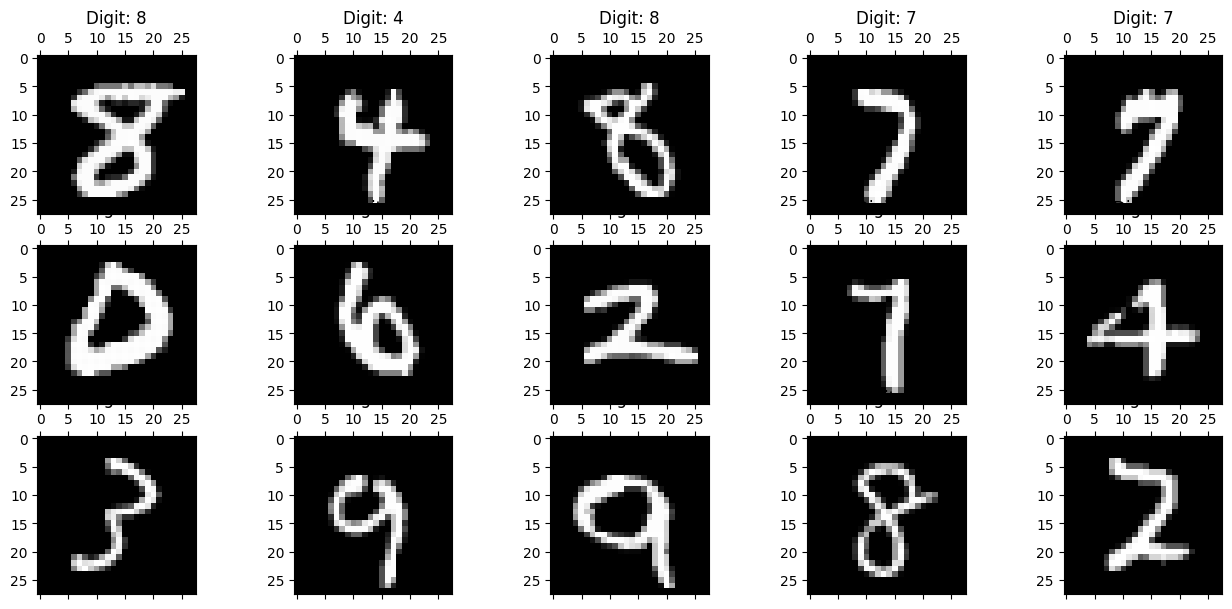

In [28]:
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'label'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### Computing T-SVD

In [30]:
truncatedSVD=TruncatedSVD(3)
svd_result = truncatedSVD.fit_transform(df[feat_cols].values)
df['svd-one'] = svd_result[:,0]
df['svd-two'] = svd_result[:,1]
df['svd-three'] = svd_result[:,2]

print('Explained variation per component: {}'.format(truncatedSVD.explained_variance_ratio_))

Explained variation per component: [0.05846323 0.08264004 0.07154668]


In [33]:
svd_result.shape

(70000, 3)

In [31]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="svd-one", y="svd-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

<Axes: xlabel='svd-one', ylabel='svd-two'>

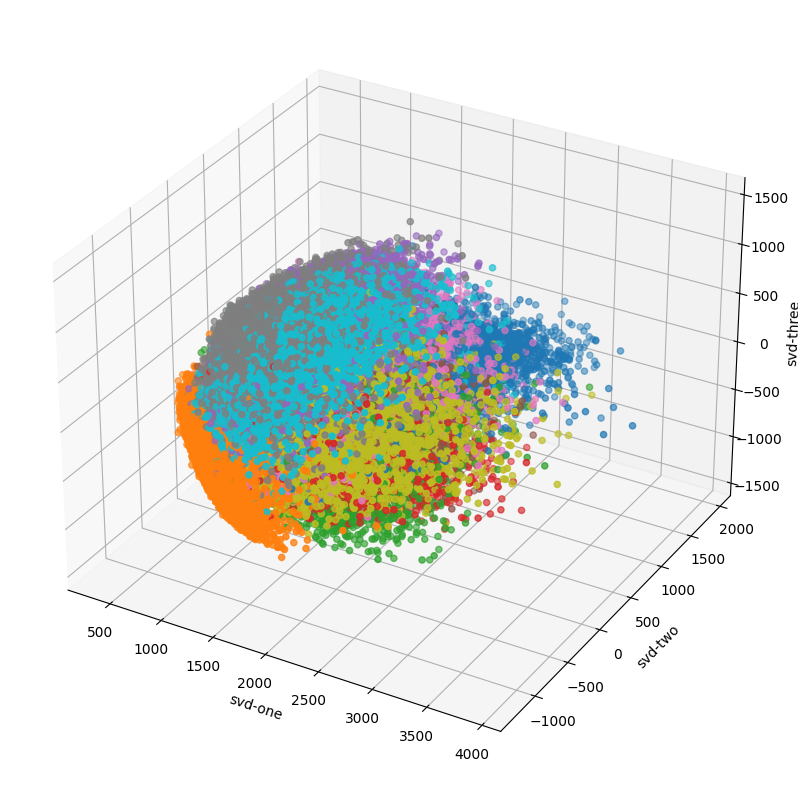

In [34]:
ax = plt.figure(figsize=(16,10)).add_subplot(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["svd-one"],
    ys=df.loc[rndperm,:]["svd-two"],
    zs=df.loc[rndperm,:]["svd-three"],
    c=df.loc[rndperm,:]["y"].astype(int),
    cmap='tab10'
)
ax.set_xlabel('svd-one')
ax.set_ylabel('svd-two')
ax.set_zlabel('svd-three')
plt.show()

# Exercise 1

Starting from the corpus of presidential speeches and the list (“corpus”) of all words in the corpus:

1. Compute word co-occurrences and PMIs. Hints:
  -  use nltk's BigramCollocationFinder on the corpus, for some window_size (e.g. = 5). Examples: https://www.nltk.org/howto/collocations.html.
  - use the method 'from_words' to obtain the finder. Then 'finder.apply_freq_filter([...])' to filter out rare co-occurrences and 'score_ngrams([...])' to compute the PMIs.
  - The attribute 'ngram_fd' of your 'finder' object of class BigramCollocationFinder will contain the words that co-occur and their frequencies. E.g., it will contain "('if', 'we'): 74".
2. With 'vocab' being the list of unique words appearing in the bigrams (you can get it from 'ngram_fd'), and N its size, create a NxN matrix containing all PMIs. Hints:
  - create an empty numpy matrix,
  - iterate over the bigrams and their PMIs, and populate the matrix (use the index of a word in 'vocab' to index the matrix).
3. Reduce the dimensionality of the matrix with SVD.
4. Write a function to find the top n most similar words for a given word in the vocabulary. Hints: use cosine_similarity from sklearn.metrics.pairwise; read the documentation for numpy's argsort (but there are also other solutions).

## Load and preprocess data

Import a few preprocessing functions from last week and a function to load the corpus of US presidential speeches (also from last week)

In [35]:
import nltk

In [36]:
!wget -q "https://www.dropbox.com/s/yfjx9nhrky1ifws/preprocessing_functions.py" -O preprocessing_functions.py

In [37]:
from preprocessing_functions import load_president_speeches, remove_punctuation, remove_numbers

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [142]:
data = load_president_speeches()
data.head()

year president                                               text
0  1845      Polk  Fellow citizens, without solicitation on my pa...
1  1949    Truman  Mr. Vice President, Mr. Chief Justice, and fel...
2  1841  Harrison  Called from a retirement which I had supposed ...
3  1809   Madison  Unwilling to depart from examples of the most ...
4  1821    Monroe  Fellow citizens, I shall not attempt to descri...

In [143]:
data["preprocessed"] = data.text.str.lower()
data.preprocessed = data.preprocessed.apply(remove_numbers)
data.preprocessed =  data.preprocessed.apply(remove_punctuation)
data["tokens"] = data.preprocessed.str.split()
data.head()

year president                                               text  \
0  1845      Polk  Fellow citizens, without solicitation on my pa...   
1  1949    Truman  Mr. Vice President, Mr. Chief Justice, and fel...   
2  1841  Harrison  Called from a retirement which I had supposed ...   
3  1809   Madison  Unwilling to depart from examples of the most ...   
4  1821    Monroe  Fellow citizens, I shall not attempt to descri...   

                                        preprocessed  \
0  fellow citizens  without solicitation on my pa...   
1  mr  vice president  mr  chief justice  and fel...   
2  called from a retirement which i had supposed ...   
3  unwilling to depart from examples of the most ...   
4  fellow citizens  i shall not attempt to descri...   

                                              tokens  
0  [fellow, citizens, without, solicitation, on, ...  
1  [mr, vice, president, mr, chief, justice, and,...  
2  [called, from, a, retirement, which, i, had, s...  
3  [unwilling, to, depart, from, examples, of, th...  
4  [fellow, citizens, i, shall, not, attempt, to,...

In [40]:
# "corpus" containing all tokens from all documents
corpus = data.tokens.sum()
corpus[:5]

['fellow', 'citizens', 'without', 'solicitation', 'on']

In [41]:
# Useful imports:
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
pmi = BigramAssocMeasures().pmi

In [ ]:
# Your code here

Starting from the corpus of presidential speeches and the list (“corpus”) of all words in the corpus:

1. Compute word co-occurrences and PMIs. Hints:
  -  use nltk's BigramCollocationFinder on the corpus, for some window_size (e.g. = 5). Examples: https://www.nltk.org/howto/collocations.html.
  - use the method 'from_words' to obtain the finder. Then 'finder.apply_freq_filter([...])' to filter out rare co-occurrences and 'score_ngrams([...])' to compute the PMIs.
  - The attribute 'ngram_fd' of your 'finder' object of class BigramCollocationFinder will contain the words that co-occur and their frequencies. E.g., it will contain "('if', 'we'): 74".

In [45]:
window = 5
finder = BigramCollocationFinder.from_words(corpus, window_size=window)
finder.apply_freq_filter(3)

2. With 'vocab' being the list of unique words appearing in the bigrams (you can get it from 'ngram_fd'), and N its size, create a NxN matrix containing all PMIs. Hints:
  - create an empty numpy matrix,
  - iterate over the bigrams and their PMIs, and populate the matrix (use the index of a word in 'vocab' to index the matrix).

In [71]:
vocab = list(set({term for tuple_ in finder.ngram_fd for term in tuple_}))

In [ ]:
pmis = finder.score_ngrams(pmi)

print(pmis[0:5])

In [51]:
vocab_to_index = {word: i for i, word in enumerate(vocab)}

In [53]:
matrix = np.zeros((len(vocab), len(vocab)))

In [54]:
for (w1,w2), pmi in pmis:
    matrix[vocab_to_index[w1], vocab_to_index[w2]] = pmi

In [59]:
matrix.shape

(3109, 3109)

3. Reduce the dimensionality of the matrix with SVD.
4. Write a function to find the top n most similar words for a given word in the vocabulary. Hints: use cosine_similarity from sklearn.metrics.pairwise; read the documentation for numpy's argsort (but there are also other solutions).

In [60]:
svd = TruncatedSVD(50)
X = svd.fit_transform(matrix)

In [61]:
from sklearn.metrics.pairwise import cosine_similarity

cos = cosine_similarity(X, X)

In [73]:
def top_n_similar_vocabs(word, cos, n=5):
    try:
        i = vocab_to_index[word]
    except KeyError as e:
        return np.array([])
    arr = cos[i]
    return np.array(vocab)[(-arr).argsort()[1:(n+1)]]

In [74]:
top_n_similar_vocabs("toward", cos)

array(['meet', 'summon', 'like', 'without', 'relations'], dtype='<U17')

In [75]:
top_n_similar_vocabs("towardxx", cos) #empty array in case out of vocab

array([], dtype=float64)

# Word2Vec

In [76]:
!wget https://github.com/vatsal220/medium_articles/blob/main/w2v/data/shakespeare.txt?raw=true
!mv /content/shakespeare.txt?raw=true /content/shakespeare.txt

--2023-11-15 15:56:30--  https://github.com/vatsal220/medium_articles/blob/main/w2v/data/shakespeare.txt?raw=true
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/vatsal220/medium_articles/raw/main/w2v/data/shakespeare.txt [following]
--2023-11-15 15:56:30--  https://github.com/vatsal220/medium_articles/raw/main/w2v/data/shakespeare.txt
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/vatsal220/medium_articles/main/w2v/data/shakespeare.txt [following]
--2023-11-15 15:56:31--  https://raw.githubusercontent.com/vatsal220/medium_articles/main/w2v/data/shakespeare.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.co

In [77]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import pandas as pd
import nltk
import string
import matplotlib.pyplot as plt
import gensim
import gensim.downloader as api
corpus = api.load('text8')
from nltk.corpus import stopwords
from nltk import word_tokenize
from gensim.models import Word2Vec as w2v
from sklearn.manifold import TSNE



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[==================================================] 100.0% 31.6/31.6MB downloaded


In [78]:
# constants
PATH = '/content/shakespeare.txt'
sw = stopwords.words('english')
plt.style.use('ggplot')


# import data
lines = []
with open(PATH, 'r') as f:
    for l in f:
        lines.append(l)

In [80]:
lines[0:5]

['"ACT I"\n',
 '"SCENE I. London. The palace."\n',
 '"Enter KING HENRY, LORD JOHN OF LANCASTER, the EARL of WESTMORELAND, SIR WALTER BLUNT, and others"\n',
 '"So shaken as we are, so wan with care,"\n',
 '"Find we a time for frighted peace to pant,"\n']

### Pre processing

In [81]:
# remove new lines
lines = [line.rstrip('\n') for line in lines]

# make all characters lower
lines = [line.lower() for line in lines]

# remove punctuations from each line
lines = [line.translate(str.maketrans('', '', string.punctuation)) for line in lines]

# tokenize
lines = [word_tokenize(line) for line in lines]

def remove_stopwords(lines, sw = sw):
    '''
    The purpose of this function is to remove stopwords from a given array of
    lines.
    '''

    res = []
    for line in lines:
        original = line
        line = [w for w in line if w not in sw]
        if len(line) < 1:
            line = original
        res.append(line)
    return res

filtered_lines = remove_stopwords(lines = lines, sw = sw)

In [82]:
print('before:', lines[0:2])

print('after', filtered_lines[0:2])

before: [['act', 'i'], ['scene', 'i', 'london', 'the', 'palace']]
after [['act'], ['scene', 'london', 'palace']]


### Model Training

In [83]:
w = w2v(
    filtered_lines,
    min_count=3,
    sg=1,
    window=7,
    vector_size=100
)

print(w.wv.most_similar('thou'))

[('thyself', 0.8553606867790222), ('art', 0.8229169249534607), ('villain', 0.7821939587593079), ('dost', 0.7693444490432739), ('wherefore', 0.7317097187042236), ('kill', 0.7314167618751526), ('fellow', 0.7076658010482788), ('traitor', 0.6985231041908264), ('slave', 0.6914922595024109), ('wilt', 0.6913099884986877)]


### Saving and Loading Model

In [84]:
Model_name='shakes'

w.wv.save_word2vec_format(f'''{Model_name}.w2v''', binary=True)
w.wv.save_word2vec_format(f'''{Model_name}.txt''', binary=False)

from gensim.models.keyedvectors import KeyedVectors
w_load = KeyedVectors.load_word2vec_format(f'''{Model_name}.w2v''', binary=True)
w_load = KeyedVectors.load_word2vec_format(f'''{Model_name}.txt''', binary=False)
print(list(w_load.key_to_index))

['thou', 'thy', 'shall', 'thee', 'good', 'lord', 'come', 'sir', 'well', 'would', 'enter', 'let', 'ill', 'love', 'hath', 'man', 'one', 'go', 'upon', 'like', 'know', 'us', 'say', 'may', 'make', 'yet', 'king', 'must', 'see', 'tis', 'give', 'take', 'speak', 'mine', 'tell', 'exeunt', 'much', 'think', 'never', 'time', 'exit', 'heart', 'great', 'hear', 'art', 'death', 'men', 'away', 'doth', 'life', 'father', 'hand', 'made', 'look', 'scene', 'ay', 'thus', 'true', 'pray', 'sweet', 'god', 'fair', 'master', 'lady', 'day', 'two', 'done', 'leave', 'eyes', 'name', 'heaven', 'fear', 'blood', 'could', 'honour', 'night', 'therefore', 'nothing', 'till', 'noble', 'poor', 'ever', 'world', 'though', 'comes', 'old', 'son', 'whose', 'nay', 'hast', 'duke', 'even', 'way', 'better', 'call', 'many', 'first', 'grace', 'stand', 'madam', 'queen', 'brother', 'house', 'dead', 'every', 'bear', 'still', 'find', 'peace', 'live', 'head', 'put', 'within', 'word', 'little', 'keep', 'friends', 'part', 'might', 'thing', 'die

In [85]:
! ls -lh

total 23M
drwxrwxr-x 2 root root 4.0K Nov 16  2021 corpus
-rw-r--r-- 1 root root 316K Nov 15 15:07 corpus.zip
-rw-r--r-- 1 root root 430K Nov 15 14:47 harry.txt
-rw-r--r-- 1 root root 2.9K Nov 15 15:07 preprocessing_functions.py
drwxr-xr-x 2 root root 4.0K Nov 15 15:07 __pycache__
drwxr-xr-x 1 root root 4.0K Nov 13 14:20 sample_data
-rw-r--r-- 1 root root 4.4M Nov 15 15:56 shakespeare.txt
-rw-r--r-- 1 root root  14M Nov 15 16:04 shakes.txt
-rw-r--r-- 1 root root 4.6M Nov 15 16:04 shakes.w2v


In [86]:
!head -n 2 shakes.txt

11628 100
thou 0.12937103 -0.074480884 0.5118471 0.67575735 -0.35041615 -0.36649957 0.24046421 0.41224042 -0.3074236 -0.15572754 0.6056956 0.15760322 -0.12901847 -0.033494897 -0.55346215 -0.31560335 0.2378251 -0.08827 -0.8017773 -0.83513194 0.24556562 0.16570978 0.61224186 0.072741434 0.2793809 -0.119445965 -0.403832 0.19872011 -0.5538642 -0.302442 -0.44170123 0.047007028 0.55171883 -0.19206037 -0.08929609 -0.102335915 0.30043244 -0.48338482 -0.24104068 -0.5717067 -0.46330598 0.08521372 -0.6198307 -0.25427225 0.006524234 -0.24979466 -0.21223572 0.3444465 0.116648175 0.5870804 -0.49550235 -0.028463768 -0.5139733 0.09592681 0.28747052 -0.634223 0.57352215 -0.49066886 -0.39428547 0.35599035 0.13242036 0.08628278 -0.20065428 -0.63645977 -0.56736386 0.3871113 0.0029729449 0.55223787 -0.5451934 0.23466118 0.42001465 0.70156485 0.1259007 -0.25177127 0.51162755 0.12701994 0.5311602 -0.14773016 -0.6630486 -0.44733563 -0.0073082605 0.11317973 0.45476267 0.77424437 -0.3936754 -0.0027648744 0.3683

### Loading pretrained models

In [87]:
model = api.load("glove-wiki-gigaword-50")
model.most_similar("glass")

[==================================================] 100.0% 66.0/66.0MB downloaded


[('plastic', 0.79425048828125),
 ('metal', 0.7708716988563538),
 ('walls', 0.7700635194778442),
 ('marble', 0.7638523578643799),
 ('wood', 0.7624280452728271),
 ('ceramic', 0.7602593302726746),
 ('pieces', 0.7589112520217896),
 ('stained', 0.7528817653656006),
 ('tile', 0.748193621635437),
 ('furniture', 0.7463858723640442)]

King - Man + Woman = Queen

In [88]:
model.most_similar(positive=['woman', 'king'], negative=['man'], topn=4)

[('queen', 0.8523604273796082),
 ('throne', 0.7664334177970886),
 ('prince', 0.7592144012451172),
 ('daughter', 0.7473883628845215)]

# Glove

In [89]:
# !pip install glove-python-binary
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2023-11-15 16:11:00--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-11-15 16:11:00--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-11-15 16:11:01--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [90]:
import numpy as np
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

In [92]:
glove_input_file = '/content/glove.6B.100d.txt'
# word2vec_output_file = '/content/glove.6B.100d.txt.word2vec'
# glove2word2vec(glove_input_file, word2vec_output_file) # deprecated now
model = KeyedVectors.load_word2vec_format(glove_input_file, binary=False, no_header=True)

In [93]:
# load the Stanford GloVe model
# model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=4)
print(result)

[('queen', 0.7698540687561035), ('monarch', 0.6843381524085999), ('throne', 0.6755736470222473), ('daughter', 0.6594556570053101)]


# Exercise 2

Steps:

- Train a Word2Vec model on the presidents' speeches. You must pass to Word2Vec a *list of lists of tokens* (a list of tokenized sentences). Use CBOW and a window of 5. Documentation: https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec
- Find the words most similar to, e.g. "state", "states", "president".
- Load a pre-trained gensim model (available models: https://github.com/RaRe-Technologies/gensim-data#Models) (Choose a small one to avoid waiting for the download, e.g. `glove-wiki-gigaword-100`).
- Evaluate the following relations:
  - king + woman - man = ?
  - France - Paris + London = ?
  - Find out some for yourselves

Hints:

- To split a text in sentences (to be then tokenized), use 'nltk.sent_tokenize'

In [ ]:
# your code here

In [95]:
data.head()

year president                                               text  \
0  1845      Polk  Fellow citizens, without solicitation on my pa...   
1  1949    Truman  Mr. Vice President, Mr. Chief Justice, and fel...   
2  1841  Harrison  Called from a retirement which I had supposed ...   
3  1809   Madison  Unwilling to depart from examples of the most ...   
4  1821    Monroe  Fellow citizens, I shall not attempt to descri...   

                                        preprocessed  \
0  fellow citizens  without solicitation on my pa...   
1  mr  vice president  mr  chief justice  and fel...   
2  called from a retirement which i had supposed ...   
3  unwilling to depart from examples of the most ...   
4  fellow citizens  i shall not attempt to descri...   

                                              tokens  
0  [fellow, citizens, without, solicitation, on, ...  
1  [mr, vice, president, mr, chief, justice, and,...  
2  [called, from, a, retirement, which, i, had, s...  
3  [unwilling, to, depart, from, examples, of, th...  
4  [fellow, citizens, i, shall, not, attempt, to,...

In [97]:
data['sent_tokens'] = data.text.str.lower()

data.sent_tokens = data.sent_tokens.str.replace(r'\d+', '', regex=True) # remove numbers
data.sent_tokens = data.sent_tokens.apply(lambda x: [remove_punctuation(t).split() for t in nltk.sent_tokenize(x)])

In [104]:
model = w2v(
    sentences = data.sent_tokens.sum(),
    window=5,
    sg=0, # 0 for CBoW, 1 for Skip-gram
    seed=42 # reproducibility
)

In [105]:
model.wv.most_similar('state', topn=5)

[('between', 0.9994445443153381),
 ('against', 0.9994276762008667),
 ('within', 0.9994022250175476),
 ('laws', 0.9993944764137268),
 ('general', 0.9993224740028381)]

In [106]:
model.wv.most_similar('states', topn=5)

[('of', 0.9617086052894592),
 ('the', 0.9487664103507996),
 ('united', 0.9408450126647949),
 ('constitution', 0.9258255362510681),
 ('and', 0.9226964116096497)]

In [107]:
model.wv.most_similar('president', topn=5)

[('office', 0.9989299178123474),
 ('support', 0.998909056186676),
 ('within', 0.9988613724708557),
 ('control', 0.9987321496009827),
 ('best', 0.9987218976020813)]

# Document Embeddings

In [ ]:
# "hi my names is paolo" (5,100) -> (weighted) average/sum (1,100)
# "hi my names is paolo rossi" (6,100) -> (weighted) average/sum (1,100)

###Exercise 3

You can represent a document as the sum of the word embeddings of the terms it contains.

- Compute the document embeddings for the US presidential speeches corpus.
- Write a function that, given a document (speech) id, finds the top n most similar documents (adapt the previous one for most similar terms).


Hints (but there may be other / better solutions):

- To obtain the Word2Vec embedding for a word, use 'model.wv[word]', where 'model = Word2Vec(...)'
- To obtain the document embedding, iterate over all of its words (that are present in the Word2Vec model vocabulary), and sum over all the corresponding embeddings.

**Optional**:

You can represent a document as the **weighted** sum of the word embeddings of the terms it contains, where the term weights are given by, e.g. Tf-Idf.

- Compute the document embeddings for the US presidential speeches corpus.
- Write a function that, given a document (speech) id, finds the top n most similar documents (adapt the previous one for most similar terms).


Hints (but there may be other / better solutions):

- To obtain the TfIdf values from the 'tfidf' matrix returned by fit_transform, use 'tfidf[doc_id, term_index]'. The list of terms (features) is returned by 'vectorizer.get_feature_names_out()'
- To obtain the Word2Vec embedding for a word, use 'model.wv[word]', where 'model = Word2Vec(...)'
- To obtain the document embedding, iterate over all of its words (that are present both as features for the TfIdf vectorizer and in the Word2Vec model vocabulary), and sum over all the products: (model.wv[word] * tfidf[doc_id, word_index])



In [ ]:
# relevant imports
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Your code here

In [108]:
data.head()

year president                                               text  \
0  1845      Polk  Fellow citizens, without solicitation on my pa...   
1  1949    Truman  Mr. Vice President, Mr. Chief Justice, and fel...   
2  1841  Harrison  Called from a retirement which I had supposed ...   
3  1809   Madison  Unwilling to depart from examples of the most ...   
4  1821    Monroe  Fellow citizens, I shall not attempt to descri...   

                                        preprocessed  \
0  fellow citizens  without solicitation on my pa...   
1  mr  vice president  mr  chief justice  and fel...   
2  called from a retirement which i had supposed ...   
3  unwilling to depart from examples of the most ...   
4  fellow citizens  i shall not attempt to descri...   

                                              tokens  \
0  [fellow, citizens, without, solicitation, on, ...   
1  [mr, vice, president, mr, chief, justice, and,...   
2  [called, from, a, retirement, which, i, had, s...   
3  [unwilling, to, depart, from, examples, of, th...   
4  [fellow, citizens, i, shall, not, attempt, to,...   

                                         sent_tokens  
0  [[fellow, citizens, without, solicitation, on,...  
1  [[mr, vice, president, mr, chief, justice, and...  
2  [[called, from, a, retirement, which, i, had, ...  
3  [[unwilling, to, depart, from, examples, of, t...  
4  [[fellow, citizens, i, shall, not, attempt, to...

In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(data.preprocessed)

In [114]:
tfidf_features_names = list(vectorizer.get_feature_names_out())

In [115]:
tfidf_feature_to_index = {word: i for i, word in enumerate(tfidf_features_names)}

def tfidf_weight(doc_id, term):
    return tfidf[doc_id, tfidf_feature_to_index[term]]

In [117]:
tfidf_weight(1, 'states')

0.021944532482887823

In [125]:
cbow_words = list(model.wv.index_to_key)
cbow_words_set = set(cbow_words) # O(1)

def get_document_embedding(doc_id, type='mean'):
    document = data.tokens[doc_id]
    embedding = np.zeros_like(model.vector_size)
    N = 0
    for word in document:
        if word in cbow_words_set:
            embedding = embedding + model.wv[word] # * tfidf_weight(doc_id, word)
            N += 1
    if type == 'mean':
        return embedding / N
    return embedding

In [126]:
doc_embeddings = np.zeros((data.shape[0], model.vector_size))

for i in range(data.shape[0]):
    doc_embeddings[i] = get_document_embedding(i, 'mean')

In [128]:
doc_cos = cosine_similarity(doc_embeddings, doc_embeddings)

In [129]:
def top_n_docs(doc_id, sim_matrix, top_n=5):
    print(f'Dcouments most similar to {data.president.loc[doc_id]}, {data.year.loc[doc_id]}')
    arr = sim_matrix[doc_id]
    return data[['president', 'year']].loc[(-arr).argsort()[1:(top_n+1)]]

In [132]:
top_n_docs(2, doc_cos)

Dcouments most similar to Harrison, 1841


president  year
0       Polk  1845
3    Madison  1809
14     Hayes  1877
17    Hoover  1929
19   Jackson  1833

### Doc2Vec

In [133]:
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Test Data

In [134]:
data = ["The process of searching for a job can be very stressful, but it doesn’t have to be. Start with a\
        well-written resume that has appropriate keywords for your occupation. Next, conduct a targeted job search\
        for positions that meet your needs.",
        "Gardening in mixed beds is a great way to get the most productivity from a small space. Some investment\
        is required, to purchase materials for the beds themselves, as well as soil and compost. The\
        investment will likely pay-off in terms of increased productivity.",
        "Looking for a job can be very stressful, but it doesn’t have to be. Begin by writing a good resume with\
        appropriate keywords for your occupation. Second, target your job search for positions that match your\
        needs."]

In [135]:
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(data)]
tagged_data


[TaggedDocument(words=['the', 'process', 'of', 'searching', 'for', 'a', 'job', 'can', 'be', 'very', 'stressful', ',', 'but', 'it', 'doesn', '’', 't', 'have', 'to', 'be', '.', 'start', 'with', 'a', 'well-written', 'resume', 'that', 'has', 'appropriate', 'keywords', 'for', 'your', 'occupation', '.', 'next', ',', 'conduct', 'a', 'targeted', 'job', 'search', 'for', 'positions', 'that', 'meet', 'your', 'needs', '.'], tags=['0']),
 TaggedDocument(words=['gardening', 'in', 'mixed', 'beds', 'is', 'a', 'great', 'way', 'to', 'get', 'the', 'most', 'productivity', 'from', 'a', 'small', 'space', '.', 'some', 'investment', 'is', 'required', ',', 'to', 'purchase', 'materials', 'for', 'the', 'beds', 'themselves', ',', 'as', 'well', 'as', 'soil', 'and', 'compost', '.', 'the', 'investment', 'will', 'likely', 'pay-off', 'in', 'terms', 'of', 'increased', 'productivity', '.'], tags=['1']),
 TaggedDocument(words=['looking', 'for', 'a', 'job', 'can', 'be', 'very', 'stressful', ',', 'but', 'it', 'doesn', '’',

#### Initializing and Training model

In [136]:
doc_model = gensim.models.doc2vec.Doc2Vec(vector_size=30, min_count=2, epochs=80)
doc_model.build_vocab(tagged_data)
doc_model.train(tagged_data, total_examples=doc_model.corpus_count, epochs=80)
doc_model.save("d2v.model")

#### Finding most similar document

In [137]:
doc_model = Doc2Vec.load("d2v.model")
similar_doc = doc_model.dv.most_similar('0')
print(similar_doc)

[('2', 0.9393066763877869), ('1', 0.9199612140655518)]


#### Infer vector for unknown data

In [138]:
test_data = word_tokenize("When your focus is to improve employee performance, it’s essential to encourage ongoing\
                        dialogue between managers and their direct reports. Some companies encourage supervisors\
                        to hold one-on-one meetings with employees as a way to facilitate\
                        two-way communication.".lower())
v1 = doc_model.infer_vector(test_data)

In [139]:
v1.shape

(30,)

In [141]:
data

['The process of searching for a job can be very stressful, but it doesn’t have to be. Start with a        well-written resume that has appropriate keywords for your occupation. Next, conduct a targeted job search        for positions that meet your needs.',
 'Gardening in mixed beds is a great way to get the most productivity from a small space. Some investment        is required, to purchase materials for the beds themselves, as well as soil and compost. The        investment will likely pay-off in terms of increased productivity.',
 'Looking for a job can be very stressful, but it doesn’t have to be. Begin by writing a good resume with        appropriate keywords for your occupation. Second, target your job search for positions that match your        needs.']

In [144]:
data = load_president_speeches()

data["preprocessed"] = data.text.str.lower()
data.preprocessed = data.preprocessed.apply(remove_numbers)
data.preprocessed =  data.preprocessed.apply(remove_punctuation)
data["tokens"] = data.preprocessed.str.split()

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(data.tokens)]

doc_model = Doc2Vec(documents, window=5, seed=1)

In [145]:
d2v_embeddings = np.array([doc_model.infer_vector(data.tokens[i]) for i in range(data.shape[0])])

In [146]:
d2v_cos = cosine_similarity(d2v_embeddings, d2v_embeddings)

In [147]:
top_n_docs(2, d2v_cos)

Dcouments most similar to Harrison, 1841


president  year
21       Adams  1797
23    VanBuren  1837
13  Washington  1789
10      Pierce  1853
55     Lincoln  1861

#t-SNE

In [148]:
X,y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
print(X.shape, y.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784) (70000,)


In [149]:
feat_cols = ['pixel' +str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))

N = 10000
df_subset = df.loc[rndperm[:N],:].copy()

truncatedSVD=TruncatedSVD(3)
svd_result = truncatedSVD.fit_transform(df_subset[feat_cols].values)
df_subset['svd-one'] = svd_result[:,0]
df_subset['svd-two'] = svd_result[:,1]
df_subset['svd-three'] = svd_result[:,2]
print('Explained variation per  component: {}'.format(truncatedSVD.explained_variance_ratio_))

Explained variation per  component: [0.05906622 0.08285095 0.07121377]


In [150]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.042s...
[t-SNE] Computed neighbors for 10000 samples in 11.004s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 567.115604
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.517845
[t-SNE] KL divergence after 300 iterations: 2.806153
t-SNE done! Time elaps

In [151]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)

<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

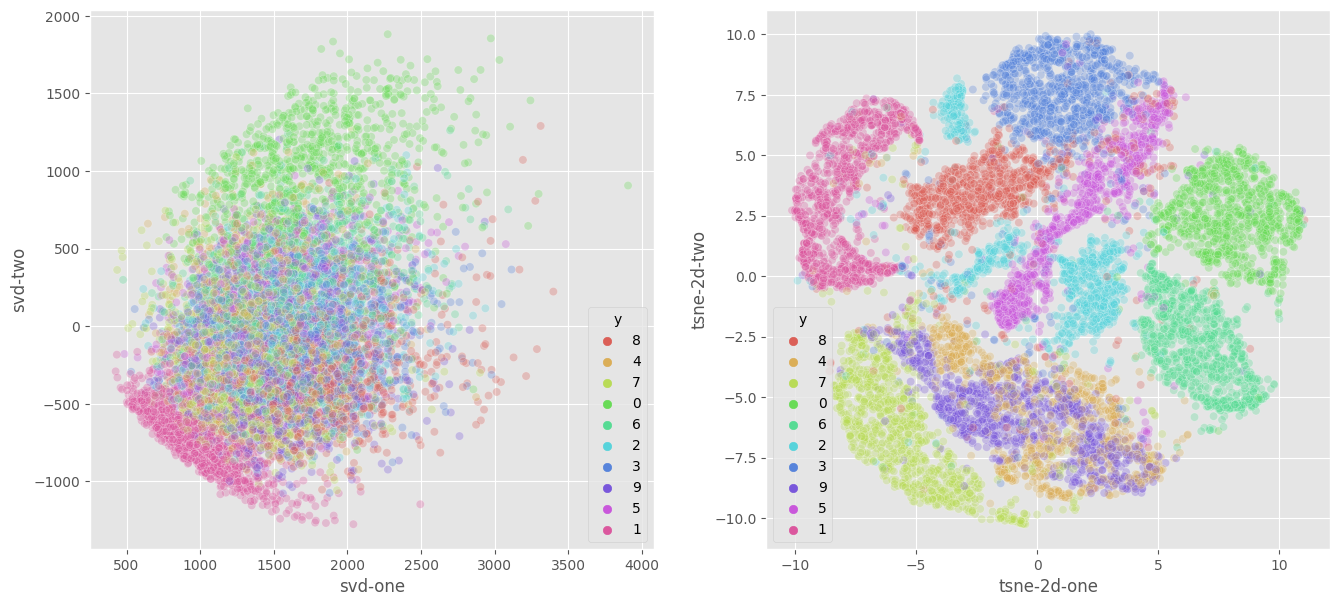

In [152]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)

sns.scatterplot(
    x="svd-one", y="svd-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)

In [154]:
labels = []
tokens = []
num_token = 500
if not num_token:
    num_token=len(list(w.wv.key_to_index))

In [155]:
for word in list(w.wv.key_to_index)[:num_token]:
        tokens.append(w.wv[word])
        labels.append(word)

tokens = np.array(tokens)

In [156]:
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=3000, random_state=23)
new_values = tsne_model.fit_transform(tokens)

### t-sne examples

In [157]:
def tsne_plot_trained(model,num_token=None):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    if not num_token:
      num_token=len(list(model.wv.key_to_index))

    for word in list(model.wv.key_to_index)[:num_token]:
        tokens.append(model.wv[word])
        labels.append(word)

    tokens = np.array(tokens)
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=3000, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()


tsne_plot_trained(w,num_token=500)

In [ ]:
model = KeyedVectors.load_word2vec_format(glove_input_file, binary=False, no_header=True)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.001s...
[t-SNE] Computed neighbors for 500 samples in 0.033s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 1.403522
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.595379
[t-SNE] KL divergence after 2400 iterations: 0.970726


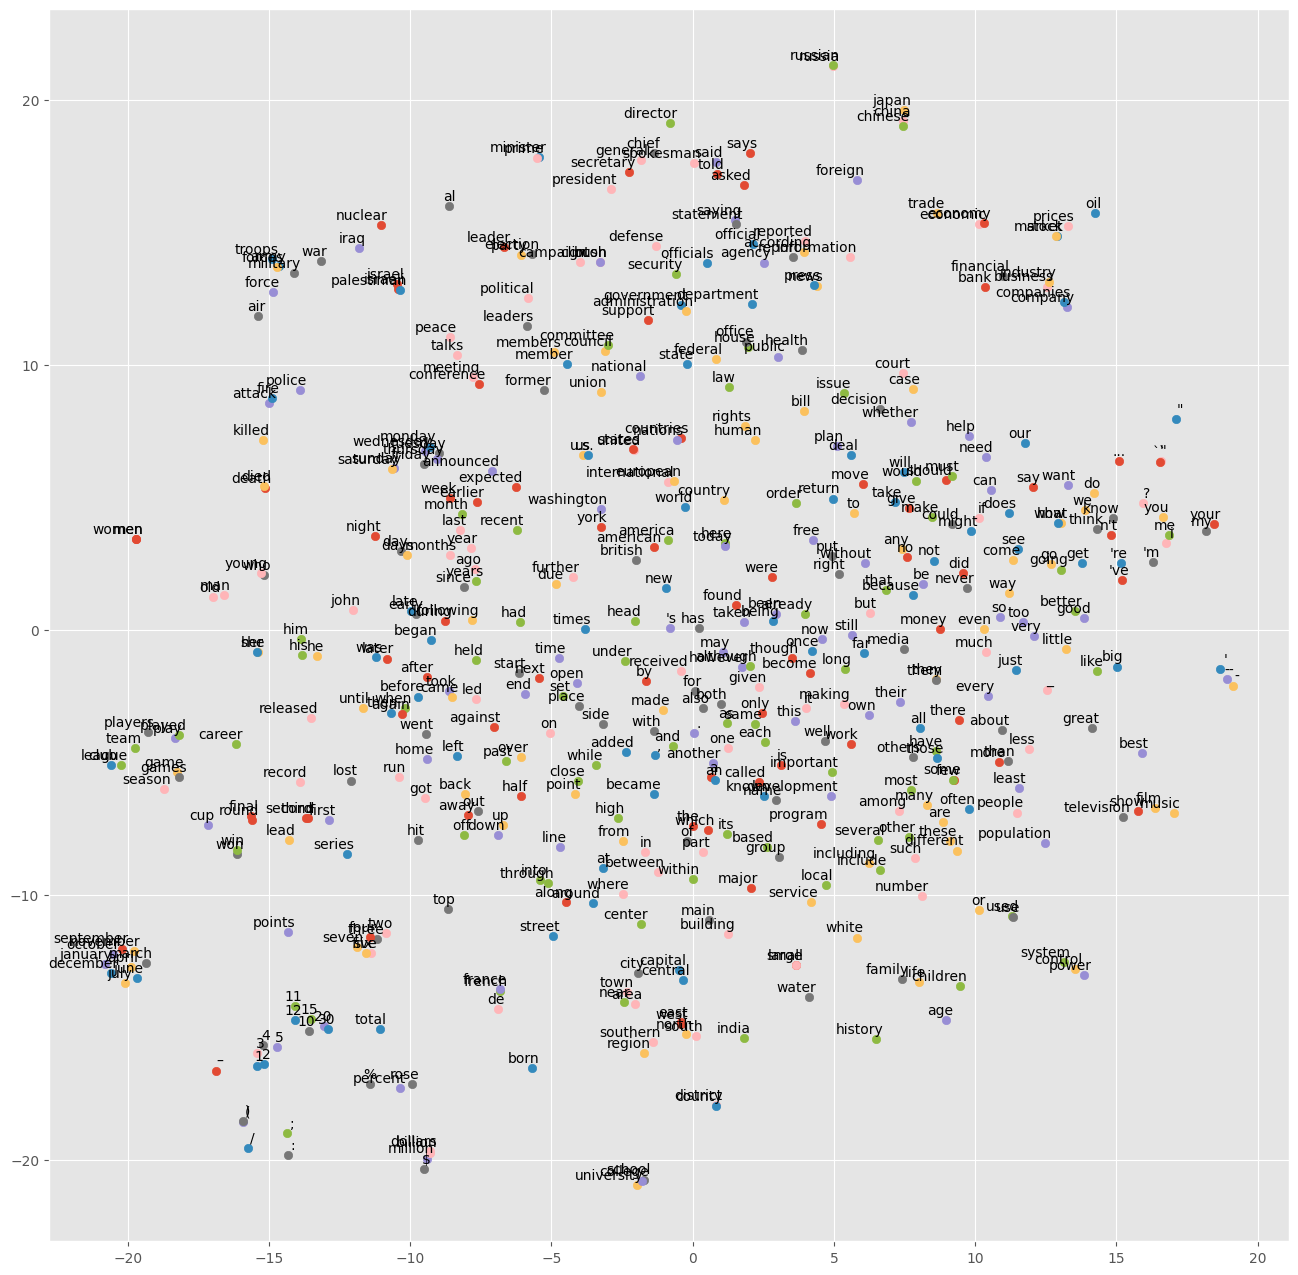

In [ ]:
def tsne_plot(model,num_token=None):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    if not num_token:
      num_token=len(list(model.key_to_index))

    for word in list(model.key_to_index)[:num_token]:
        tokens.append(model[word])
        labels.append(word)
    tokens = np.array(tokens)

    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=3000, random_state=23,verbose=1)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
tsne_plot(model,num_token=500)

# Exercise 4

Use Doc2Vec (https://radimrehurek.com/gensim/models/doc2vec.html) to compute the embeddings for the documents in the presidential speeches dataset. Write a function that finds the most similar documents for a given document(adapt the previous function).

Hints: see the usage example in https://radimrehurek.com/gensim/models/doc2vec.html.

In [ ]:
# relevant imports
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [ ]:
data = load_president_speeches()

data["preprocessed"] = data.text.str.lower()
data.preprocessed = data.preprocessed.apply(remove_numbers)
data.preprocessed =  data.preprocessed.apply(remove_punctuation)
data["tokens"] = data.preprocessed.str.split()
data.head()

year   president                                               text  \
0  1953  Eisenhower  My friends, before I begin the expression of t...   
1  1889    Harrison  Fellow-Citizens, there is no constitutional or...   
2  1853      Pierce  My Countrymen, It a relief to feel that no hea...   
3  1969       Nixon  Senator Dirksen, Mr. Chief Justice, Mr. Vice P...   
4  1989        Bush  Mr. Chief Justice, Mr. President, Vice Preside...   

                                        preprocessed  \
0  my friends  before i begin the expression of t...   
1  fellow citizens  there is no constitutional or...   
2  my countrymen  it a relief to feel that no hea...   
3  senator dirksen  mr  chief justice  mr  vice p...   
4  mr  chief justice  mr  president  vice preside...   

                                              tokens  
0  [my, friends, before, i, begin, the, expressio...  
1  [fellow, citizens, there, is, no, constitution...  
2  [my, countrymen, it, a, relief, to, feel, that...  
3  [senator, dirksen, mr, chief, justice, mr, vic...  
4  [mr, chief, justice, mr, president, vice, pres...

In [ ]:
d2v_doc_embeddings = np.array([doc_model.infer_vector(data.tokens[i]) for i in range(data.shape[0])])
d2v_doc_cos = cosine_similarity(d2v_doc_embeddings, d2v_doc_embeddings)
def top_n_most_similar_docs(doc_id, sim_matrix, n = 5):
  # uses global vocab
  print(f"Documents most similar to: {data.president.loc[doc_id]} {data.year.loc[doc_id]}")
  arr = sim_matrix[doc_id]
  return data[['president', 'year']].loc[(-arr).argsort()[1:(n+1)]]